## TITANIC SURVIVAL PREDICTION 🚢


#### Project Overview
This project predicts Titanic passenger survival using machine learning. It involves data preprocessing, feature engineering, and training a **Logistic Regression** model. Key steps include handling missing data, encoding categorical variables, and model evaluation. The goal is to build an accurate classifier that determines survival likelihood based on passenger characteristics like age, gender, and class. 🚢

### **Objectives:** 🚢  

1. **Survival Data Analysis:**  
   - Analyze the Titanic dataset to understand survival distribution across different passenger groups.  
   - Identify key factors influencing survival, such as passenger class, age, gender, and fare.  

2. **Data Preprocessing:**  
   - Handle missing values in features like age and cabin.  
   - Encode categorical variables (e.g., gender, embarkation port) for model compatibility.  
   - Scale numerical features for better model performance.  

3. **Feature Engineering:**  
   - Create new meaningful features (e.g., family size, ticket fare per person).  
   - Extract insights from names (e.g., titles like Mr., Mrs., Miss) to enhance predictions.  

4. **Exploratory Data Analysis (EDA):**  
   - Use statistical summaries and visualizations (e.g., bar charts, histograms, correlation heatmaps) to uncover patterns in survival trends.  

5. **Prediction Model Development:**  
   - Implement **Logistic Regression** as the primary model to predict survival probabilities.  
   - Compare with other models like Random Forest, Decision Trees, and XGBoost for benchmarking.  

6. **Model Evaluation and Tuning:**  
   - Assess model performance using **accuracy, precision, recall, F1-score, and ROC-AUC**.  

7. **Making Predictions & Interpretation:**  
   - Apply the trained model to new/unseen Titanic passenger data.  
   - Interpret predictions and analyze feature importance to provide meaningful survival insights.  

#### **Tools and Technologies Used:**
- **Programming Languages:** Python
- **Libraries:** Pandas, NumPy, Matplotlib, Seaborn, Scikit-learn
- **Data Sources:** Titanic Survival 
- **Models:** Random Forest,Support Vector Machines (SVM) Logistic Regression
- **Evaluation Metrics:** Accuracy, ROC-AUC, Precision, Recall

#### Outcome:
The model **accurately predicted** the number of **survivors and casualties** aboard the Titanic using **Logistic Regression**, based on passenger data. 🚢

In [1]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

Importing Libraries

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report ,accuracy_score,mean_absolute_error,mean_squared_error,r2_score,confusion_matrix
import joblib

import warnings
warnings.filterwarnings('ignore')

Loading Dataset

In [3]:
df=pd.read_csv("D:\\Programming\\Datasets\\Titanic Surival\\tested.csv")

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(f"\nShape of the Dataset: {df.shape}")


Shape of the Dataset: (418, 12)


Data Exploration

In [6]:
print("\nDataset Summary:")
print(df.info())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


##### **Checking for Missing Values in the Dataset** ✅

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### **Handling Missing Data: Dropping the 'Cabin' Column** 🚢

In [8]:
dataset=df.drop(columns='Cabin',axis=1)

In [9]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

In [10]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [11]:
print("\nMissing Values:")
print(dataset.isnull().sum())


Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64


In [12]:
dataset.dropna(inplace=True)

In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 

### **Exploratory Data Analysis (EDA) 📊🔍**

In [14]:
print("\nSummary Statistics:")
df.describe()



Summary Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188,1.839713
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576,1.519072
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200,1.000000
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000,2.000000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200,11.000000


In [15]:
dataset['Survived'].value_counts()

Survived
0    265
1    152
Name: count, dtype: int64

In [16]:
dataset['Sex'].value_counts()

Sex
male      265
female    152
Name: count, dtype: int64

In [17]:
dataset['Embarked'].value_counts()

Embarked
S    269
C    102
Q     46
Name: count, dtype: int64

In [18]:
print("Columns in Dataset")
print(df.columns)

Columns in Dataset
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize'],
      dtype='object')


### Data Visualization

### **Visualization of Survival Count** 📊🚢

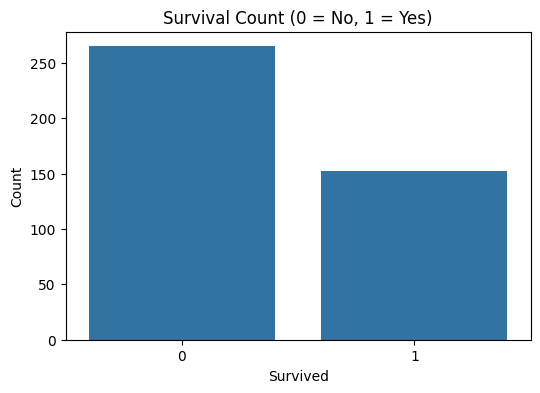

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=dataset)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.xlabel("Survived")
plt.ylabel("Count")
plt.show()

### **Gender Distribution of Titanic Passengers** 🚹🚺

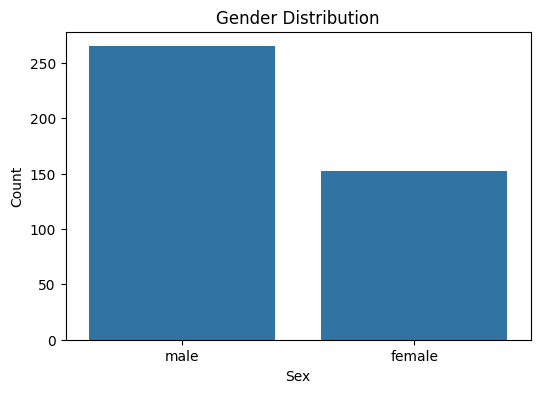

In [20]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset,x='Sex')
plt.title('Gender Distribution')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

### **Gender Distribution by Embarkation Port** ⚓🚢

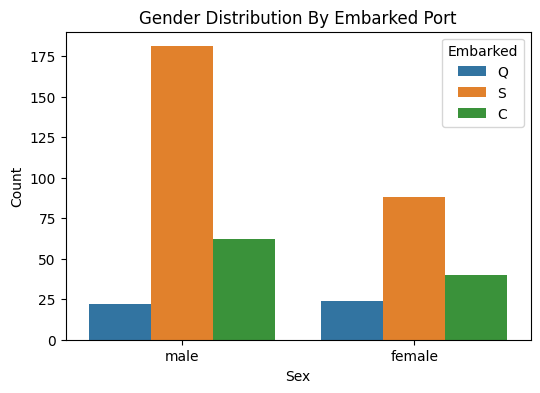

In [21]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Embarked', data=dataset)
plt.title('Gender Distribution By Embarked Port')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

### **Passenger Class Distribution on the Titanic** 🎟️🚢

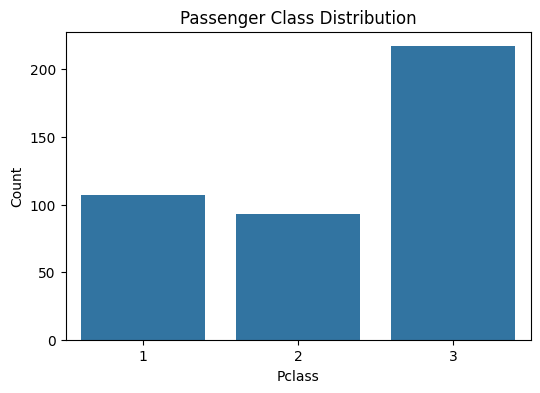

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=dataset,x='Pclass')
plt.title('Passenger Class Distribution')
plt.xlabel("Pclass")
plt.ylabel("Count")
plt.show()

### **Distribution of Numerical Features in the Dataset** 📊

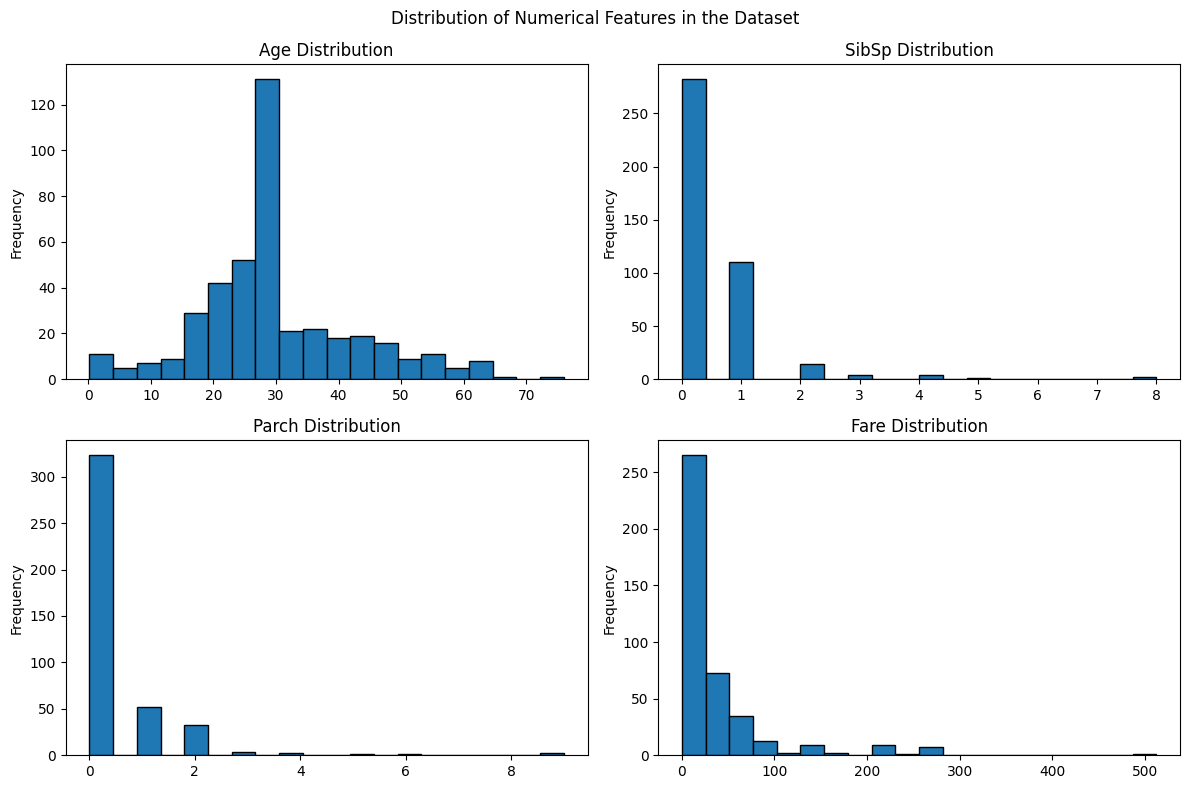

In [23]:
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

plt.figure(figsize=(12, 8))

plt.suptitle('Distribution of Numerical Features in the Dataset')

for i in range(4):
    plt.subplot(2, 2, i + 1)
    dataset[numerical_cols[i]].plot.hist(bins=20, edgecolor='black')
    plt.title(f'{numerical_cols[i]} Distribution')

plt.tight_layout()
plt.show()


### **Distribution of Categorical Features in the Dataset** 📊🚢

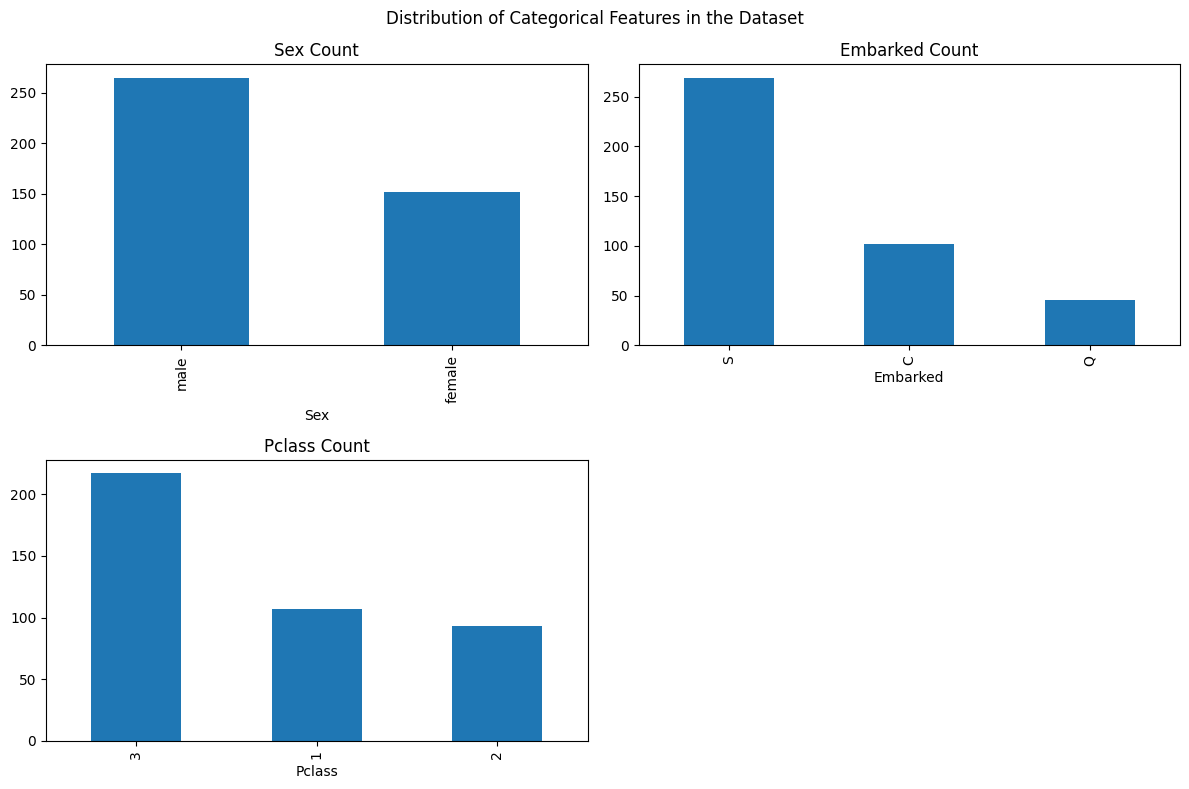

In [24]:
categorical_cols = ['Sex', 'Embarked', 'Pclass']

plt.figure(figsize=(12, 8))

plt.suptitle('Distribution of Categorical Features in the Dataset')
for i in range(3):
    plt.subplot(2, 2, i + 1)
    dataset[categorical_cols[i]].value_counts().plot.bar()
    plt.title(f'{categorical_cols[i]} Count')

plt.tight_layout()
plt.show()


### **Survival Analysis Based on Different Features** 📊🚢

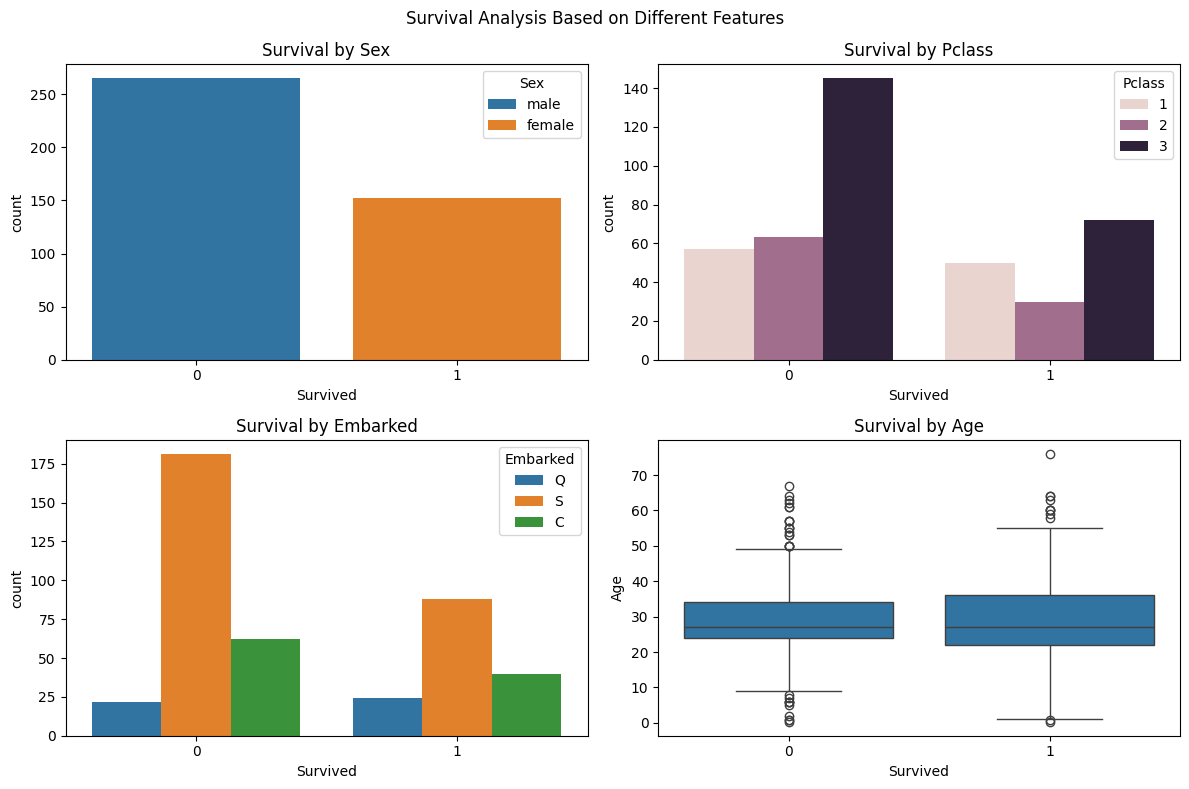

In [25]:
plt.figure(figsize=(12, 8))

plt.suptitle('Survival Analysis Based on Different Features')

plt.subplot(2, 2, 1)
sns.countplot(x='Survived', hue='Sex', data=dataset)
plt.title('Survival by Sex')

plt.subplot(2, 2, 2)
sns.countplot(x='Survived', hue='Pclass', data=dataset)
plt.title('Survival by Pclass')

plt.subplot(2, 2, 3)
sns.countplot(x='Survived', hue='Embarked', data=dataset)
plt.title('Survival by Embarked')

plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Age', data=dataset)
plt.title('Survival by Age')

plt.tight_layout()
plt.show()

### **Correlation Matrix of Numerical Features** 🔥📊

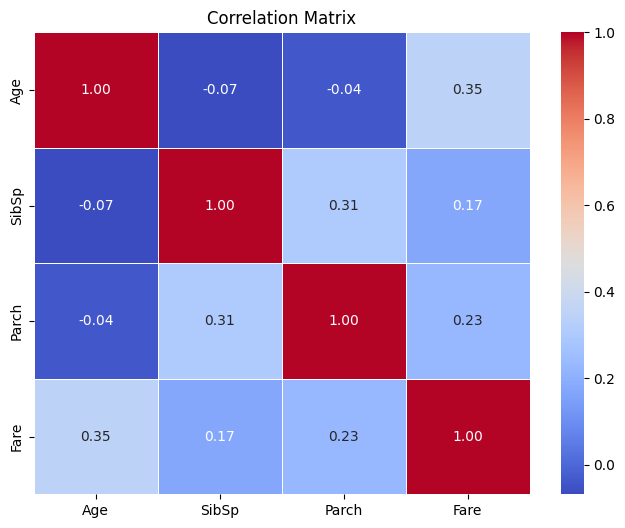

In [26]:
plt.figure(figsize=(8, 6))
corr_matrix = dataset[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Encoding Categorical Features Using Label Encoding** 🔄

In [27]:
le = LabelEncoder()

dataset['Sex'] = le.fit_transform(dataset['Sex'])
dataset['Embarked']=le.fit_transform(dataset['Embarked'])


### **Feature Scaling: Min-Max Normalization & Standardization** 📏⚖️

In [28]:
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Min-Max Normalization (scaling features to [0, 1] range)
data_min_max = dataset.copy()  # Create a copy to preserve the original data
data_min_max[numerical_cols] = min_max_scaler.fit_transform(data_min_max[numerical_cols])

# Z-score Standardization (scaling features to have mean 0 and std 1)
data_standardized = dataset.copy()  # Create a copy to preserve the original data
data_standardized[numerical_cols] = standard_scaler.fit_transform(data_standardized[numerical_cols])

print("Min-Max Normalized Data (first 5 rows):")
print(data_min_max[['Age', 'SibSp', 'Parch', 'Fare']].head())

print("\nStandardized Data (first 5 rows):")
print(data_standardized[['Age', 'SibSp', 'Parch', 'Fare']].head())


Min-Max Normalized Data (first 5 rows):
        Age  SibSp     Parch      Fare
0  0.452723  0.000  0.000000  0.015282
1  0.617566  0.125  0.000000  0.013663
2  0.815377  0.000  0.000000  0.018909
3  0.353818  0.000  0.000000  0.016908
4  0.287881  0.125  0.111111  0.023984

Standardized Data (first 5 rows):
        Age     SibSp     Parch      Fare
0  0.394417 -0.500218 -0.400804 -0.497811
1  1.385449  0.615242 -0.400804 -0.512660
2  2.574688 -0.500218 -0.400804 -0.464532
3 -0.200203 -0.500218 -0.400804 -0.482888
4 -0.596616  0.615242  0.618314 -0.417971


### **Defining Features and Target Variable for Model Training** 🎯📊

In [29]:
X=dataset[['Age','Pclass','Sex','Parch','SibSp','Fare','Embarked']]
y=dataset['Survived']

### **Splitting the Dataset into Training and Testing Sets** ✂️📊

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

### **Training and Evaluating the Logistic Regression Model** 🤖✅

In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 100.00%


In [32]:
model.predict(X_test)

array([1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0])

### **Evaluating Model Performance: Accuracy Score** ✅📊

In [33]:
model.score(X_test,y_test)

1.0

### **Model Performance Evaluation: Accuracy, Classification Report & Confusion Matrix** 📊✅

Accuracy Score : 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



<Axes: >

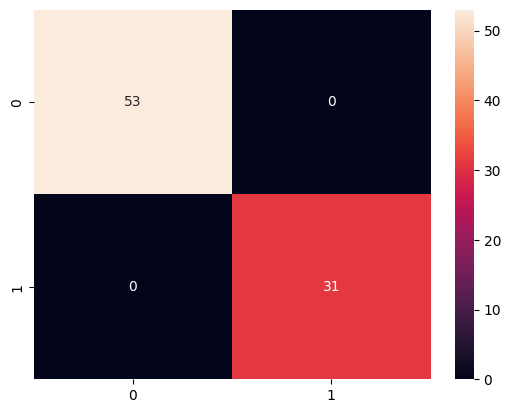

In [34]:

print("Accuracy Score :", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)

### **Saving the Trained Model Using Joblib** 💾✅

In [35]:

model_filename = 'model.joblib'

# Save the model
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as model.joblib
